<a href="https://colab.research.google.com/github/Santigs/AI/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Red Neuronal para identificar dígitos utilizando Pytorch
#descargar datos

from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)

X.shape, y.shape

((70000, 784), (70000,))

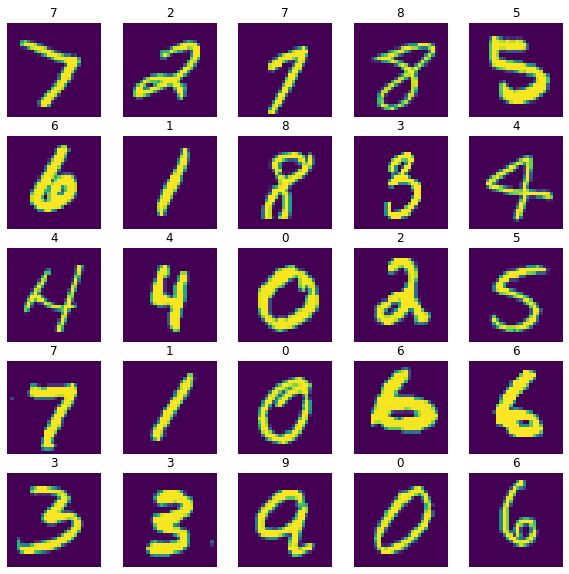

In [2]:
# visualizar imágenes

import matplotlib.pyplot as plt
import random

fig, axs = plt.subplots(5,5, figsize=(10,10))
for _ax in axs:
    for ax in _ax:
        ix = random.randint(0, len(X)-1)
        img = X[ix].reshape((28,28))
        ax.imshow(img)
        ax.set_title(y[ix])
        ax.axis('off')

plt.show()


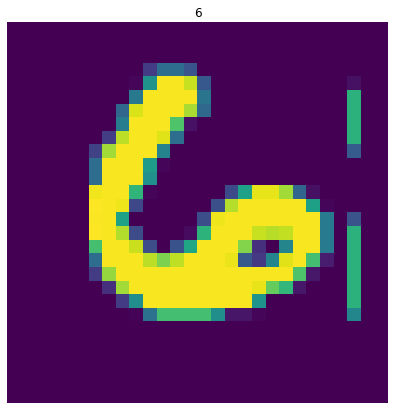

In [8]:

ix = random.randint(0, len(X)-1)
img = X[ix].reshape((28,28))


plt.figure(figsize=(7,7))
plt.title(y[ix])
plt.axis('off')


draw = plt.imshow(img)



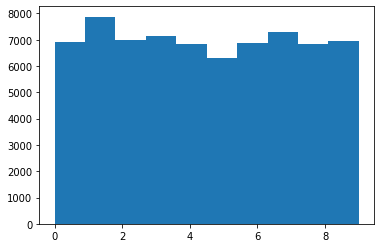

In [9]:
plt.hist(y, bins=10)
plt.show()

In [10]:
# separar en train y test

X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [0]:
# definir red

import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [12]:
# asegurar que las dimensiones encajan

input = torch.randn((10, 784))
output = model(input)
output.shape # deberia ser [10, 10], (batch size, número de clases)

torch.Size([10, 10])

In [13]:
# baseline, como se comporta la red antes de entrenar

acc = 0
for X, y in zip(X_test, y_test):
    X, y = torch.from_numpy(X).float(), torch.tensor([y])
    pred = model(X.unsqueeze(0))
    pred = torch.argmax(pred, axis=1).item()
    acc += pred == y.item()
acc = acc / len(X_test)
acc

0.1218

In [14]:
import numpy as np

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 3
for e in range(1,epochs+1):
    losses = []
    for X, y in zip(X_train, y_train):
        X, y = torch.from_numpy(X).float(), torch.tensor([y]).long()
        pred = model(X.unsqueeze(0))
        optimizer.zero_grad()
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f'Epoch {e}/{epochs} \
          Loss {np.mean(losses):.5f}')

Epoch 1/3           Loss 0.52454
Epoch 2/3           Loss 0.35596
Epoch 3/3           Loss 0.33416


In [15]:

acc = 0
for X, y in zip(X_test, y_test):
    X, y = torch.from_numpy(X).float(), torch.tensor([y])
    pred = model(X.unsqueeze(0))
    pred = torch.argmax(pred, axis=1).item()
    acc += pred == y.item()
acc = acc / len(X_test)
acc

0.9257